In [ ]:
!pip install scikit-fuzzy
#https://pythonhosted.org/scikit-fuzzy/overview.html

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
pressaoPedal = ctrl.Antecedent(np.arange(0, 101, 1), 'pressaoPedal')
pressaoPedal['alta'] = fuzz.trimf(pressaoPedal.universe, [50, 100, 100])
pressaoPedal['media'] = fuzz.trimf(pressaoPedal.universe, [30, 50, 70])
pressaoPedal['baixa'] = fuzz.trimf(pressaoPedal.universe, [0, 0, 50])

vRoda = ctrl.Antecedent(np.arange(0, 101, 1), 'vRoda')
vRoda['devagar'] = fuzz.trimf(vRoda.universe, [0, 0, 60])
vRoda['media'] = fuzz.trimf(vRoda.universe, [20, 50, 80])
vRoda['rapida'] = fuzz.trimf(vRoda.universe, [40, 100, 100])

vCarro = ctrl.Antecedent(np.arange(0, 101, 1), 'vCarro')
vCarro['devagar'] = fuzz.trimf(vCarro.universe, [0, 0, 60])
vCarro['media'] = fuzz.trimf(vCarro.universe, [20, 50, 80])
vCarro['rapida'] = fuzz.trimf(vCarro.universe, [40, 100, 100])

pressaoFreio = ctrl.Consequent(np.arange(0, 101, 1), 'pressaoFreio')
pressaoFreio['aplicar'] = fuzz.trimf(pressaoFreio.universe, [0, 100, 100])
pressaoFreio['liberar'] = fuzz.trimf(pressaoFreio.universe, [0, 0, 100])

# Generate trapezoidal membership function on range [0, 1]
# x = np.arange(0, 5.05, 0.1)
# mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

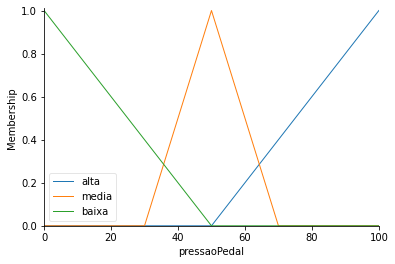

In [ ]:
pressaoPedal.view()

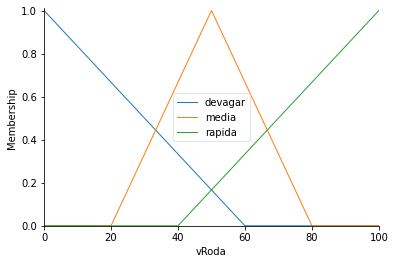

In [ ]:
vRoda.view()


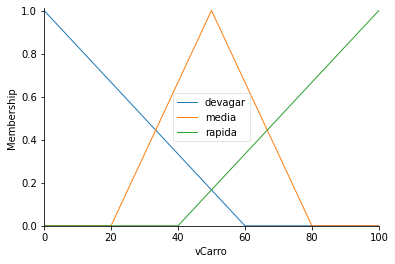

In [ ]:
vCarro.view()


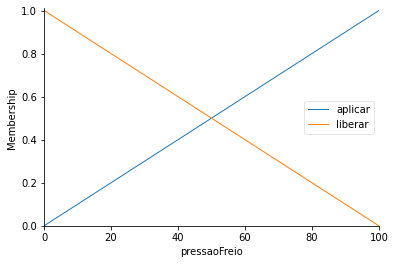

In [ ]:
pressaoFreio.view()

In [ ]:
regra01 = ctrl.Rule(pressaoPedal['media'], pressaoFreio['aplicar'] )
regra02 = ctrl.Rule(pressaoPedal['alta'] & vCarro['rapida'] & vRoda['rapida'], pressaoFreio['aplicar'] )
regra03 = ctrl.Rule(pressaoPedal['alta'] & vCarro['rapida'] & vRoda['devagar'], pressaoFreio['liberar'] )
regra04 = ctrl.Rule(pressaoPedal['baixa'], pressaoFreio['liberar'] )

regra0102 = ctrl.Rule(pressaoPedal['media'] | (pressaoPedal['alta'] & vCarro['rapida'] & vRoda['rapida']), pressaoFreio['aplicar'] )

#regra01.view()

In [ ]:
#pressaoFreio_ctrl = ctrl.ControlSystem([regra01, regra03, regra04])
pressaoFreio_ctrl = ctrl.ControlSystem([regra0102, regra03, regra04])

In [ ]:
ctrl.accumulation_max
fuzzyFreio = ctrl.ControlSystemSimulation(pressaoFreio_ctrl)

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
fuzzyFreio.input['pressaoPedal'] = 60
fuzzyFreio.input['vCarro'] = 80
fuzzyFreio.input['vRoda'] = 55

# Crunch the numbers
fuzzyFreio.compute()

60.57441249431211


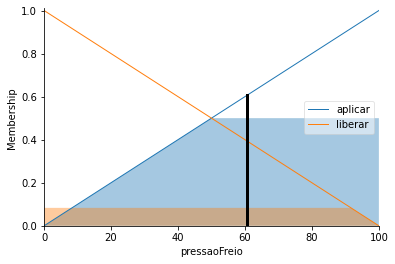

In [ ]:
print(fuzzyFreio.output['pressaoFreio'])
pressaoFreio.view(sim=fuzzyFreio)

In [ ]:
#x = np.arange(3)
#fuzz.defuzz(x, pressaoFreio, 'centroid')